## Exploratory Data Analysis (EDA)

### Table of Contents
- Introduction
- Import and Load Cleaned Data
- Bar Graphs
- Total Passengers
- Destination Plots
    - Top 10 Destinations by Passenger Volume
    - Monthly Top 10 Destinations Each Year
- Box Plots
- Conclusion / Next Steps

### Introduction
The dataset was sorted, cleaned, and exported for EDA. We will import the cleaned dataset and explore throughout this notebook what the flight data can tell us and if it can be engineered further to acheive the goal of forecasting popular destinations.

### Import and Load Cleaned Data

Let's start with importing libraries that will be needed for this EDA process. As majority of the EDA process requires visuals, different types of data visualization libraries are imported.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import datetime as dt

In [2]:
# suppress Future Warnings
import warnings
warnings.simplefilter('ignore', category=FutureWarning)

In [3]:
# load in cleaned dataset
df = pd.read_csv('capstone_data_cleaned.csv')
df.head()

,DEPARTURES_PERFORMED,SEATS,PASSENGERS,CARRIER,CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN_CITY_NAME,ORIGIN_COUNTRY_NAME,DEST_AIRPORT_ID,DEST_CITY_NAME,DEST_COUNTRY_NAME,YEAR,MONTH,DATE
0,1.0,526.0,483.0,LH,Lufthansa German Airlines,13303,"Miami, FL",United States,10970,"Cologne, Germany",Germany,2013,1,2013-01-01
1,31.0,10848.0,7555.0,LH,Lufthansa German Airlines,11618,"Newark, NJ",United States,11760,"Frankfurt, Germany",Germany,2013,1,2013-01-01
2,10.0,370.0,259.0,MQ,American Eagle Airlines Inc.,11298,"Dallas/Fort Worth, TX",United States,14879,"San Luis Potosi, Mexico",Mexico,2013,1,2013-01-01
3,10.0,440.0,253.0,MQ,American Eagle Airlines Inc.,12953,"New York, NY",United States,16217,"Montreal, Canada",Canada,2013,1,2013-01-01
4,31.0,10726.0,4944.0,MS,Egyptair,12478,"New York, NY",United States,10872,"Cairo, Egypt",Egypt,2013,1,2013-01-01


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390469 entries, 0 to 390468
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   DEPARTURES_PERFORMED  390469 non-null  float64
 1   SEATS                 390469 non-null  float64
 2   PASSENGERS            390469 non-null  float64
 3   CARRIER               390435 non-null  object 
 4   CARRIER_NAME          390469 non-null  object 
 5   ORIGIN_AIRPORT_ID     390469 non-null  int64  
 6   ORIGIN_CITY_NAME      390469 non-null  object 
 7   ORIGIN_COUNTRY_NAME   390469 non-null  object 
 8   DEST_AIRPORT_ID       390469 non-null  int64  
 9   DEST_CITY_NAME        390469 non-null  object 
 10  DEST_COUNTRY_NAME     390469 non-null  object 
 11  YEAR                  390469 non-null  int64  
 12  MONTH                 390469 non-null  int64  
 13  DATE                  390469 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 41.

All the characteristics of the dataframe looks to match from the previous step, except for `DATE` column being converted to object data type. It will need to be converted back to datetime data type.

In [5]:
# convert DATE column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

### Bar Graphs

First, let's start off with some bar graphs. Taking a look at, in the last decade, frequently flown to or most visited destinations and destinations with most passengers.

DEST_CITY_NAME
Toronto, Canada           28536
Cancun, Mexico            17441
London, United Kingdom    15715
Mexico City, Mexico       11784
Vancouver, Canada         11719
                          ...  
Ekaterinburg, Russia          1
Guiyang, China                1
Rostov, Russia                1
Trujillo, Peru                1
Bangkok, Thailand             1
Name: count, Length: 887, dtype: int64


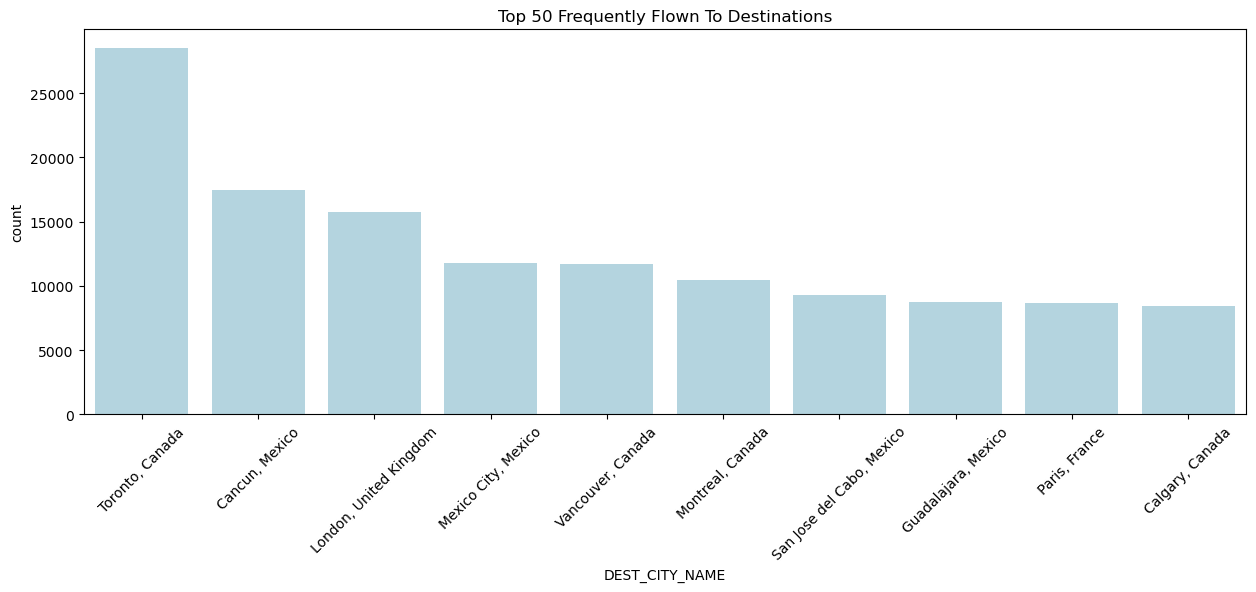

In [6]:
# total number of flights over the years per destination
df_tf=df.copy()
print(df_tf['DEST_CITY_NAME'].value_counts())
plt.figure(figsize=(15,5))
sns.countplot(data=df_tf, x='DEST_CITY_NAME', order=df_tf.DEST_CITY_NAME.value_counts().iloc[:10].index, color='lightblue') # show the top 50 destinations
plt.xticks(rotation=45)
plt.title('Top 50 Frequently Flown To Destinations')
plt.show()

Looking at the top 10 flown to destinations from United States in the past decade, Toronto, Canada is #1 with almost 30,000 flights. Rest of the cities in the top 10 are from Canada and Mexico, except for London and Paris sneaking into the top 10. It seems logical that nearby international cities are the most flown to due to proximity and demand. There could be multiple flights in a day to nearby cities. Also, as these are major cities or vacation spots there could be higher demand to visit them due to shorter flight time rather than flying across the Atlantic or Pacific for longer hours. Now taking a look at passenger volume over the decade for comparison.

                DEST_CITY_NAME  PASSENGERS
0       London, United Kingdom  82901047.0
1              Toronto, Canada  61014792.0
2               Cancun, Mexico  50807892.0
3                 Tokyo, Japan  39602357.0
4          Mexico City, Mexico  39077951.0
..                         ...         ...
882          Dabaa City, Egypt         1.0
883  Sagarai, Papua New Guinea         1.0
884           Borlange, Sweden         1.0
885       Lac La Ronge, Canada         1.0
886             Liguria, Italy         1.0

[887 rows x 2 columns]


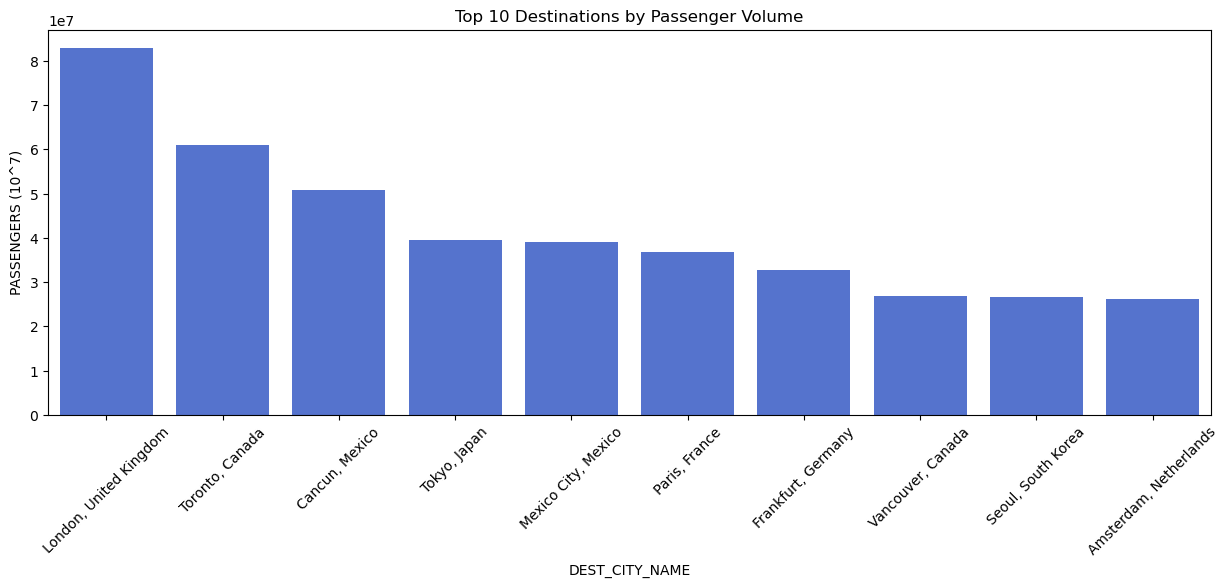

In [7]:
# total number of passengers per destination
df_tp = df.copy()
df_tp = df_tp[['DEST_CITY_NAME', 'PASSENGERS']].groupby('DEST_CITY_NAME')[['PASSENGERS']].sum().sort_values(by='PASSENGERS',ascending=False).reset_index()
print(df_tp)
df_tp=df_tp[0:10] # show the top 10
plt.figure(figsize=(15,5))
sns.barplot(data=df_tp, x='DEST_CITY_NAME', y='PASSENGERS', color='royalblue')
plt.xticks(rotation=45)
plt.title('Top 10 Destinations by Passenger Volume')
plt.ylabel('PASSENGERS (10^7)')
plt.show()

Surprisingly, only 4 of the 10 cities from the previous graph made it. Two of the cities are across the Pacific, Tokyo and Seoul, and the four of the cities are across the Atlantic, London, Paris, Frankfurt, and Amsterdam. Flights overseas would be larger airplanes with more seats and thus larger capacity. It looks like frequency does not equate to quantity and that there's not as a strong correlation between flight frequency and passenger volume.

Since flight frequency doesn't necessarily mean profit whereas passengers do, we will shift our focus to passenger volume of destinations throughout this EDA.

### Total Passengers

We can begin by taking an overall look at total passenger volume in our dataset.

In [8]:
# total volume of passengers over the years
df_total = df.copy()
df_total = df_total[['DATE','PASSENGERS']].groupby('DATE').sum()[['PASSENGERS']].reset_index()
fig = px.line(df_total, x='DATE', y='PASSENGERS', markers=True)
fig.update_layout(
    yaxis_title="Passengers (millions)", 
    xaxis_title="Year",
    title="Total Passengers (Jan 2013 to May 2024)"
)
fig.show()

Off the bat, seasonality can clearly be seen from Jan 2013 to about Jan 2020. An upwards trend can also be seen during that time frame. As we all know, a major distruption to the aviation industry occured from 2020 to about 2022 due to COVID and impact of that can definitively be seen on the plot. Recovery period can be seen from about 2021 onward and seasonality returning around mid-2022 with an upwards trend.

Since each entry of flight is on a monthly basis, we can break down the plot in detail to monthly.

In [9]:
# total passenger volume each year seen monthly
df_monthly = df.copy()
df_monthly = df_monthly[['MONTH', 'YEAR', 'PASSENGERS']].groupby(['MONTH', 'YEAR']).mean()[['PASSENGERS']].reset_index()
years = df_monthly['YEAR'].unique()

fig = go.Figure()
for y in df_monthly['YEAR'].unique():
    dfy = df_monthly[df_monthly['YEAR']==y]
    fig.add_traces(go.Scatter(x=dfy['MONTH'], y=dfy['PASSENGERS'], mode='lines+markers', name=str(y)))

fig.update_layout(
    yaxis_title="Passengers", 
    xaxis_title="Month",
    legend_title="Years", 
    title="Total Passenger Volume per Month"
)
fig.show()

Breaking down the total passenger volume monthly for the years, seasonality can be seen in more detail. Beginning of the year always has the lowest volume and it increases towards the middle of the year, peaking in July, then gradually declining towards end of the year. Summer season is expected to have the most passengers as it's a popular season for vacation. Similarly, passenger volume picks up towards end of the year as it's holiday season. Also as we saw in the overall plot, the impact of COVID to the aviation industry can be seen as 2020 had a drop in volume and then the recovery period slowly starting around late 2020 to early 2021.

To further explore the dataset in detail, we can take a look at it by destinations.

### Destination Plots

The dataframe is modified to group the data by date, city, and passengers for that date.

In [10]:
# dataframe for destination plotting
df_dest = df.copy()
df_dest = df_dest[['DATE', 'PASSENGERS','DEST_CITY_NAME']]\
    .groupby(['DATE','DEST_CITY_NAME'], as_index=False)['PASSENGERS'].sum()\
        .sort_values(by=['DATE','PASSENGERS'], ascending=[True,False]).reset_index(drop=True)
df_dest.head()

,DATE,DEST_CITY_NAME,PASSENGERS
0,2013-01-01,"London, United Kingdom",517423.0
1,2013-01-01,"Toronto, Canada",422479.0
2,2013-01-01,"Tokyo, Japan",373605.0
3,2013-01-01,"Cancun, Mexico",247724.0
4,2013-01-01,"Mexico City, Mexico",240324.0


#### Top 10 Destinations by Passenger Volume

Taking what was done earlier to look at top 10 destinations by passenger volume, now those destinations with its passenger volume will be plotted across time.

In [11]:
# top 10 overall passenger volume destinations
top_cities = df_tp['DEST_CITY_NAME'].unique()
print(top_cities)

df_tc = []
for c in top_cities:
    df_tc.append(df_dest[df_dest['DEST_CITY_NAME'] == c])
df_tc = pd.concat(df_tc)
df_tc

['London, United Kingdom' 'Toronto, Canada' 'Cancun, Mexico'
 'Tokyo, Japan' 'Mexico City, Mexico' 'Paris, France' 'Frankfurt, Germany'
 'Vancouver, Canada' 'Seoul, South Korea' 'Amsterdam, Netherlands']


,DATE,DEST_CITY_NAME,PASSENGERS
0,2013-01-01,"London, United Kingdom",517423.0
247,2013-02-01,"London, United Kingdom",411641.0
495,2013-03-01,"London, United Kingdom",567949.0
746,2013-04-01,"London, United Kingdom",644073.0
994,2013-05-01,"London, United Kingdom",733345.0
...,...,...,...
33998,2024-01-01,"Amsterdam, Netherlands",181979.0
34272,2024-02-01,"Amsterdam, Netherlands",170332.0
34538,2024-03-01,"Amsterdam, Netherlands",228053.0
34815,2024-04-01,"Amsterdam, Netherlands",258207.0


In [12]:
# plot top 10 overall passenger volume destinations in one plot
fig = go.Figure()
for c in df_tp['DEST_CITY_NAME'].unique():
    dfc = df_dest[df_dest['DEST_CITY_NAME']==c]
    fig.add_traces(go.Scatter(x=dfc['DATE'], y=dfc['PASSENGERS'], mode='lines+markers', name=c))

fig.update_layout(
    yaxis_title="Passengers", 
    xaxis_title="Month",
    legend_title="Years", 
    title="Top 10 Destinations by Passenger Volume"
)
fig.show()

Plotting the top 10 destinations in a single plot, we can see the rise and fall of each destination. London stays on top until COVID lockdown and throughout the pandemic years Cancun emerges on top. As the travel restrictions are lifted and travel begins to resume back to normal, London climbs back onto the top spot. Toronto, which was second during pre-2020, goes back and forth with Cancun post-2022. Rest of the top destinations seem to return to normal also.

As it can be a bit difficult see each destination in detail, they are plotted individually below. Seasonality and trend of each destination can be seen easier when plotted individually.

In [13]:
# plot each top 10 overall passenger volume destinations
fig = px.line(
    df_tc, x='DATE', y='PASSENGERS', color='DEST_CITY_NAME', facet_col='DEST_CITY_NAME',
    facet_col_wrap=5,
    height=500,
    width=2400,
    title="Top 10 Destinations by Passenger Volume"
    )
fig.for_each_annotation(lambda x: x.update(text=x.text.split('=')[-1]))
fig.show()

These top 10 destinations in terms of passenger volume were based on static inference earlier from the bar graph. We saw Cancun had overtaken London during the pandemic years, could there have been other destinations that overtook these top 10 destinations in the past decade? We can find out by gathering the top 10 destinations in terms of passenger volume every month for the past decade.

#### Monthly Top 10 Destinations Each Year

In [14]:
# top '10' destinations each month every year
top_dest = df_dest.groupby(['DATE']).apply(lambda x: x.head(10)).reset_index(drop=True)
top_dest

,DATE,DEST_CITY_NAME,PASSENGERS
0,2013-01-01,"London, United Kingdom",517423.0
1,2013-01-01,"Toronto, Canada",422479.0
2,2013-01-01,"Tokyo, Japan",373605.0
3,2013-01-01,"Cancun, Mexico",247724.0
4,2013-01-01,"Mexico City, Mexico",240324.0
...,...,...,...
1365,2024-05-01,"Frankfurt, Germany",354768.0
1366,2024-05-01,"Mexico City, Mexico",347926.0
1367,2024-05-01,"Vancouver, Canada",311201.0
1368,2024-05-01,"Amsterdam, Netherlands",302083.0


In [15]:
# plot destinations that were in the top 10 over the years in one plot
fig = px.line(top_dest, x='DATE', y='PASSENGERS', markers=True, color='DEST_CITY_NAME', 
              title='Popular Destinations over the Years',
              )
fig.show()

Again, the destinations are plotted on a single plot for comparison. This time there are more than 10 destinations as new destinations peaked in the top 10 during certain month of certain year. For example, Montreal was in the top 10 sporadically throughout the years in Feb 2013, Mar 2013, Feb 2014, etc.

When these destinations are plotted individually below, it can be easily seen how frequent or when these destinations were in the top 10.

In [16]:
# plot each destinations that were in the top 10 over the years
fig = px.line(
    top_dest, x='DATE', y='PASSENGERS', color='DEST_CITY_NAME', markers=True,
    facet_col='DEST_CITY_NAME', facet_col_wrap=5, facet_row_spacing=0.05, facet_col_spacing=0.04,

    height=800, width=2400,
    title='Popular Destinations over the Years'
              )
fig.for_each_annotation(lambda x: x.update(text=x.text.split('=')[-1]))
fig.update_yaxes(showticklabels=True, matches=None)
fig.show()

Some destinations, such as Taipei or Istanbul, broke into the top 10 once or few times. These could almost be seen as an anomaly as it was during the pandemic years (2020-2021) and it could also be that these cities might not have restricted travel or lifted the restriction sooner than other cities.

Some destinations had a meteoric rise into the top 10 post-2020 such as San Jose del Cabo, Punta Cana, and Montego Bay. These destinations are relatively close to United States and are vacation spots with resorts and such. It could be that countries across the Atlantic or Pacific were slow to allow travel post-2020, which could have resulted in the sudden popularity for these resort destinations.

### Box Plots

A lot of EDA were gathered from the bar and line graphs and now moving onto box plots for some statistical analysis.

In [17]:
# Total passenger volume distribution
fig=px.box(df_total, y='PASSENGERS')
fig.update_layout(
    width=400,
    height=700,
    title='Boxplot of Total Passenger Volume'
)
fig.show()

Looking at the total passenger volume over the years shows there is around 8.5 million passengers each year. The impact of the pandemic can be realized here also as the data has negative skew and have more values that fall below the lower quartile and quite a bit of outliers.

In [18]:
# Passenger volume distribution over the years
fig=px.box(df_monthly, x='YEAR', y='PASSENGERS', color='YEAR')
fig.update_layout(
    width=1000,
    height=500,
    title='Boxplot of Total Passenger Volume',
)
fig.show()

Breaking down yearly and diving further into the total passenger volume, pre-2020 there was a positive skew resulting in gradual positive trend. Interestingly, post-2020 there is negative skew and yet a rapid positive trend.

In [19]:
# distribution of each top 10 overall passenger volume destinations
fig = px.box(
    df_tc, y='PASSENGERS', color='DEST_CITY_NAME', facet_col='DEST_CITY_NAME',
    facet_col_wrap=5,
    boxmode='overlay',
    facet_col_spacing=0.07,
    height=800,
    width=1400,
    title='Boxplot of Top 10 Destination by Passenger Volume',
              )
fig.for_each_annotation(lambda x: x.update(text=x.text.split('=')[-1]))
fig.update_yaxes(showticklabels=True, matches=None)
fig.show()

A look at the distribution of the top 10 destinations in terms of passenger volume shows most of the destinations having either normal distribution or negative skew except for Frankfurt, which has a positive skew.

In [20]:
# distribution of each destinations that were in the top 10 over the years
fig = px.box(
    top_dest, y='PASSENGERS', color='DEST_CITY_NAME', facet_col='DEST_CITY_NAME', facet_col_wrap=5,
    boxmode='overlay',
    facet_row_spacing=0.03,
    facet_col_spacing=0.07,
    height=2400,
    width=1600,
    title='Boxplot of Popular Destinations'
              )
fig.for_each_annotation(lambda x: x.update(text=x.text.split('=')[-1]))
fig.update_yaxes(showticklabels=True, matches=None)
fig.show()

A look at the distribution of destinations that made the top 10 on a monthly basis. Other than outlier destinations that have one or few data points which are not enough to see a distribution, there are a variety of distributions.

### Conclusion / Next Steps
The dataframe had to be modified to focus on passenger volume for the destinations and some interesting insights were gathered from these visuals. Flight frequency did not directly correlate with passenger volume and since flight frequency does not contribute to profit as much as passenger volume the focus of the EDA shifted to passenger volume. Outstandingly, the impact of COVID was evident and seen in all the plots. Destinations that were popular before COVID (pre-2020) were different from the ones during the pandemic years (2020-2021) and also differed after COVID (post-2021). Seasonality that was noticeable, obviously disappeared during the pandemic years but could be seen returning post-2022 as well as the upwards trend. Later in the modeling and forecasting phase of the project, it will be interesting to see how the model will deal with such a huge anomaly of COVID.

Now that the EDA is complete, next step will be to pre-process the dataset for modeling. As mentioned throughout this EDA, the dataframe will have to be modified to focus on passenger volume of each destinations during the pre-processing phase. Also since this will be a time series model, the dataset will have to be pre-processed for time series by checking stationarity, decomposing, and plotting the autocorrelation (ACF) & partial autocorrelation functions (PACF).